In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df=pd.read_csv('black_friday.csv')

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df.shape

(550068, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [8]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

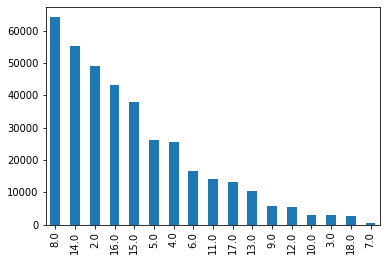

In [11]:
df['Product_Category_2'].value_counts().plot(kind='bar')

In [12]:
df['Product_Category_2'].describe()

count    376430.000000
mean          9.842329
std           5.086590
min           2.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          18.000000
Name: Product_Category_2, dtype: float64

In [13]:
df['Product_Category_2'].mode()

0    8.0
dtype: float64

In [20]:
df['Product_Category_2'].unique()

array([ 8.,  6., 14.,  2., 15., 16., 11.,  5.,  3.,  4., 12.,  9., 10.,
       17., 13.,  7., 18.])

In [18]:
df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0],inplace=True)

In [19]:
df['Product_Category_2'].isna().sum()

0

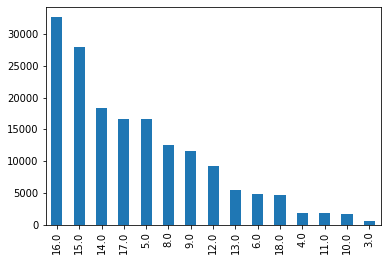

In [24]:
df['Product_Category_3'].value_counts().plot(kind='bar')

In [23]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [27]:
#fill nulla with sklearn
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')
mode_imputer = SimpleImputer(strategy='most_frequent')

In [28]:
df['Product_Category_3']=mode_imputer.fit_transform(df[['Product_Category_3']])

In [29]:
df['Product_Category_3'].isna().sum()

0

In [31]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [35]:
#label encoding for City_Category

In [33]:
df['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [34]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [36]:
City_Category_map={'A':1,'B':2,'C':3}
df['City_Category']=df['City_Category'].map(City_Category_map)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,1,2,0,3,8.0,16.0,8370
1,1000001,P00248942,F,0-17,10,1,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,1,2,0,12,8.0,16.0,1422
3,1000001,P00085442,F,0-17,10,1,2,0,12,14.0,16.0,1057
4,1000002,P00285442,M,55+,16,3,4+,0,8,8.0,16.0,7969


In [43]:
df['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [44]:
#data split to train and test
featurs=df.drop(columns=['Marital_Status'])
target=df[['Marital_Status']]

In [45]:
featurs.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,1,2,3,8.0,16.0,8370
1,1000001,P00248942,F,0-17,10,1,2,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,1,2,12,8.0,16.0,1422
3,1000001,P00085442,F,0-17,10,1,2,12,14.0,16.0,1057
4,1000002,P00285442,M,55+,16,3,4+,8,8.0,16.0,7969


In [46]:
target.head()

,Marital_Status
0,0
1,0
2,0
3,0
4,0


In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(featurs,target,test_size=0.2,shuffle=True)

In [48]:
X_train.shape,Y_train.shape

((440054, 11), (440054, 1))

In [49]:
X_test.shape,Y_test.shape

((110014, 11), (110014, 1))